# Задание

Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).


# Импорт библиотек

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

# Исходное изображение

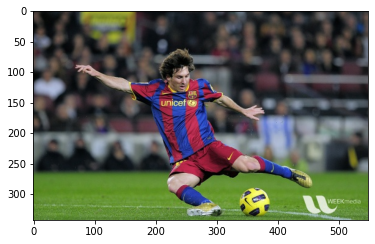

In [3]:
image = cv.imread("messi5.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)

# Задание №1: Поворот изображения относительно центра

Поворот изображения относительно центра осуществляется в результате последовательного умножения на:
1. Матрицу смещения
2. Матрицу поворота
3. Матрицу смещения

Или на компоозицию этих матриц

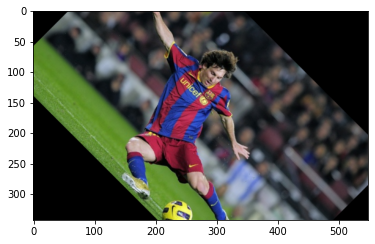

In [4]:
from math import sin, cos, pi

image = cv.imread("messi5.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

h, w = image.shape[:2]

# Смещение в центр координат
M1 = np.float32([
    [1, 0, -w/2],
    [0, 1, -h/2],
    [0, 0, 1]
]
)

# Вращение 
angle = pi/4
M2 = np.float32([
    [cos(angle), -sin(angle), 0],
    [sin(angle), cos(angle), 0],
    [0, 0, 1]]
)

# Смещение в исходное положение
M3 = np.float32([
    [1, 0, w/2],
    [0, 1, h/2],
    [0, 0, 1]
]
)

# Композиция матриц
composition = np.matmul(np.matmul(M3, M2), M1)
img_res = cv.warpAffine(image, composition[:2], (w, h))

plt.imshow(img_res)

# Задание №2: Восстановление деформированных изображений

Функция вывода размеченных изображений

In [5]:
def show_labeled_images(images_labeled: dict):
    
    f, ax = plt.subplots(1,images_labeled.__len__())

    for i, (label, image) in enumerate(images_labeled.items()):
        ax[i].imshow(image)
        ax[i].set_title(label)

    f.set_size_inches(10,10)

Функция расчёта композиции матриц

In [6]:
def calculate_composition(matrices: list):

    composition = np.identity(len(matrices[0]))

    for matrix in matrices[::-1]:
        composition = np.matmul(composition, matrix)

    return composition

## text

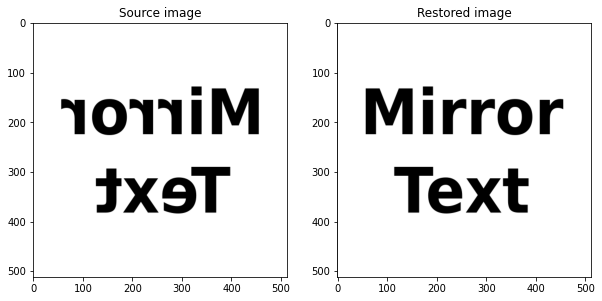

In [7]:
image = cv.imread("text.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


h, w = image.shape[:2]

# Отражение по оси x
M1 = np.float32([
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]
)
# Смещение вправо
M2 = np.float32([
    [1, 0, w],
    [0, 1, 0],
    [0, 0, 1]
]
)

# Композиция матриц
composition = calculate_composition([M1,M2])
image_restored = cv.warpAffine(image, composition[:2], (w, h))

show_labeled_images({"Source image": image, "Restored image": image_restored})

## apple

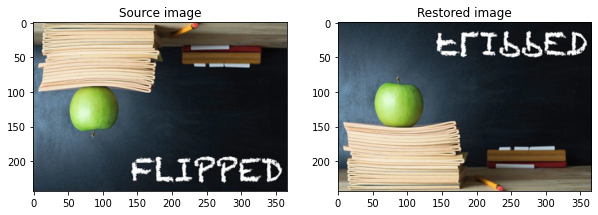

In [8]:
image = cv.imread("apple.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


h, w = image.shape[:2]

# Отражение по оси Y
M1 = np.float32([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
]
)
# Смещение вверх
M2 = np.float32([
    [1, 0, 0],
    [0, 1, h],
    [0, 0, 1]
]
)

# Композиция матриц
composition = calculate_composition([M1,M2])
image_restored = cv.warpAffine(image, composition[:2], (w, h))

show_labeled_images({"Source image": image, "Restored image": image_restored})

## phone

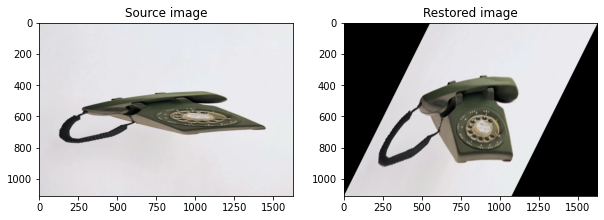

In [9]:
image = cv.imread("phone.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


h, w = image.shape[:2]


# Смещение в центр координат
M1 = np.float32([
    [1, 0, -w/2],
    [0, 1, -h/2],
    [0, 0, 1]
]
)

# Масштабирование
M2 = np.float32([
    [0.6, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
]
)

# Сдвиг вдоль осей
M3 = np.float32([
    [1, -0.5, 0],
    [0.2, 1, 0],
    [0, 0, 1]
]
)

# Смещение в исходное положение
M4 = np.float32([
    [1, 0, w/2],
    [0, 1, h/2],
    [0, 0, 1]
]
)

# Композиция матриц
composition = calculate_composition([M1, M2, M3, M4])
image_restored = cv.warpAffine(image, composition[:2], (w, h))

show_labeled_images({"Source image": image, "Restored image": image_restored})


## skull

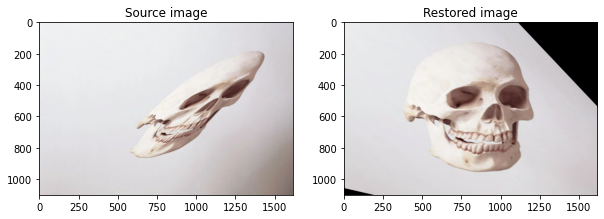

In [11]:
image = cv.imread("skull.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


h, w = image.shape[:2]


# Смещение в центр координат
M1 = np.float32([
    [1, 0, -w/2],
    [0, 1, -h/2],
    [0, 0, 1]
]
)

# Масштабирование
M2 = np.float32([
    [1.7, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
]
)

# Сдвиг вдоль осей
M3 = np.float32([
    [1, 1.5, 0],
    [0.0, 1, 0],
    [0, 0, 1]
]
)

# Вращение
angle = pi / 14
M4 = np.float32([
    [cos(angle), -sin(angle), 0],
    [sin(angle), cos(angle), 0],
    [0, 0, 1]]
)

# Смещение в исходное положение
M5 = np.float32([
    [1, 0, w/2],
    [0, 1, h/2],
    [0, 0, 1]
]
)

# Смещение
M6 = np.float32([
    [1, 0, -280],
    [0, 1, -50],
    [0, 0, 1]
]
)

# Композиция матриц
composition = calculate_composition([M1, M2, M3, M4, M5, M6])
image_restored = cv.warpAffine(image, composition[:2], (w, h))

show_labeled_images({"Source image": image, "Restored image": image_restored})
